In [163]:
import pandas as pd
from apyori import apriori
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
file = pd.read_csv(r"D:\database\Groceries_dataset.csv")

In [165]:
file

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Data Exploration

In [166]:
file.shape

(38765, 3)

In [167]:
print(file.describe())

       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000


In [168]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Data Preprocessing 

In [169]:
file.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# Duplicates

In [170]:
done = file


In [171]:
done1 = done.reset_index()
data = done1.drop(['index'], axis=1)

In [172]:
data['itemDescription'] = data['itemDescription'].str.upper()
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,TROPICAL FRUIT
1,2552,05-01-2015,WHOLE MILK
2,2300,19-09-2015,PIP FRUIT
3,1187,12-12-2015,OTHER VEGETABLES
4,3037,01-02-2015,WHOLE MILK
...,...,...,...
38760,4471,08-10-2014,SLICED CHEESE
38761,2022,23-02-2014,CANDY
38762,1097,16-04-2014,CAKE BAR
38763,1510,03-12-2014,FRUIT/VEGETABLE JUICE


# basket

In [173]:
basket = pd.crosstab(data['Member_number'], data['itemDescription'])

In [174]:
basket

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAGS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
array = np.array(basket)

In [176]:
def convert1(data):
    data[data > 0] = 1
    data[data == 0] = 0

In [177]:
convert1(array)

In [178]:
index = basket.index
columns = basket.columns

In [179]:
basket1 = pd.DataFrame(array, columns=columns, index=index)
basket1

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAGS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
Basket = basket1.drop(['TURKEY','PET CARE','PHOTO/FILM'], axis=1)

In [181]:
Basket

itemDescription,ABRASIVE CLEANER,ARTIF. SWEETENER,BABY COSMETICS,BAGS,BAKING POWDER,BATHROOM CLEANER,BEEF,BERRIES,BEVERAGES,BOTTLED BEER,...,UHT-MILK,VINEGAR,WAFFLES,WHIPPED/SOUR CREAM,WHISKY,WHITE BREAD,WHITE WINE,WHOLE MILK,YOGURT,ZWIEBACK
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# model

In [182]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [183]:
frequent_itemsets = apriori(Basket, min_support=0.005, use_colnames=True)



C:\Users\ravin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Frequent Items(top 10)

In [184]:
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_frequent_itemsets.head(10)

,support,itemsets
135,0.458184,(WHOLE MILK)
84,0.376603,(OTHER VEGETABLES)
98,0.349666,(ROLLS/BUNS)
112,0.313494,(SODA)
136,0.282966,(YOGURT)
128,0.233710,(TROPICAL FRUIT)
99,0.230631,(ROOT VEGETABLES)
7,0.213699,(BOTTLED WATER)
104,0.206003,(SAUSAGE)
1862,0.191380,"(OTHER VEGETABLES, WHOLE MILK)"


# Association Rules

In [185]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [186]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BAKING POWDER),(BOTTLED BEER),0.031042,0.158799,0.006157,0.198347,1.249042,0.001228,1.049333,0.205774
1,(BOTTLED BEER),(BAKING POWDER),0.158799,0.031042,0.006157,0.038772,1.249042,0.001228,1.008042,0.237026
2,(BAKING POWDER),(BOTTLED WATER),0.031042,0.213699,0.009749,0.314050,1.469586,0.003115,1.146294,0.329773
3,(BOTTLED WATER),(BAKING POWDER),0.213699,0.031042,0.009749,0.045618,1.469586,0.003115,1.015273,0.406379
4,(BAKING POWDER),(BROWN BREAD),0.031042,0.135967,0.005900,0.190083,1.398004,0.001680,1.066816,0.293815
...,...,...,...,...,...,...,...,...,...,...
73301,(OTHER VEGETABLES),"(SAUSAGE, YOGURT, WHOLE MILK, SODA, ROLLS/BUNS)",0.376603,0.009492,0.005387,0.014305,1.507070,0.001813,1.004883,0.539722
73302,(SODA),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, YOGURT...",0.313494,0.013597,0.005387,0.017185,1.263904,0.001125,1.003651,0.304150
73303,(YOGURT),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, SODA, ...",0.282966,0.009749,0.005387,0.019039,1.952999,0.002629,1.009471,0.680535
73304,(WHOLE MILK),"(SAUSAGE, YOGURT, OTHER VEGETABLES, SODA, ROLL...",0.458184,0.007440,0.005387,0.011758,1.580453,0.001979,1.004370,0.677850


# Max items Sold

In [187]:
count = collections.Counter(data['itemDescription'])

In [188]:
items = pd.DataFrame(count.items())

In [189]:
items = items.rename(columns={0:'items', 1:'count'})

In [190]:
items = items.sort_values(by='count', ascending=False)

In [191]:
topitems =  items.head(40)
topitems

,items,count
1,WHOLE MILK,2502
3,OTHER VEGETABLES,1898
4,ROLLS/BUNS,1716
37,SODA,1514
17,YOGURT,1334
21,ROOT VEGETABLES,1071
0,TROPICAL FRUIT,1032
16,BOTTLED WATER,933
18,SAUSAGE,924
6,CITRUS FRUIT,812


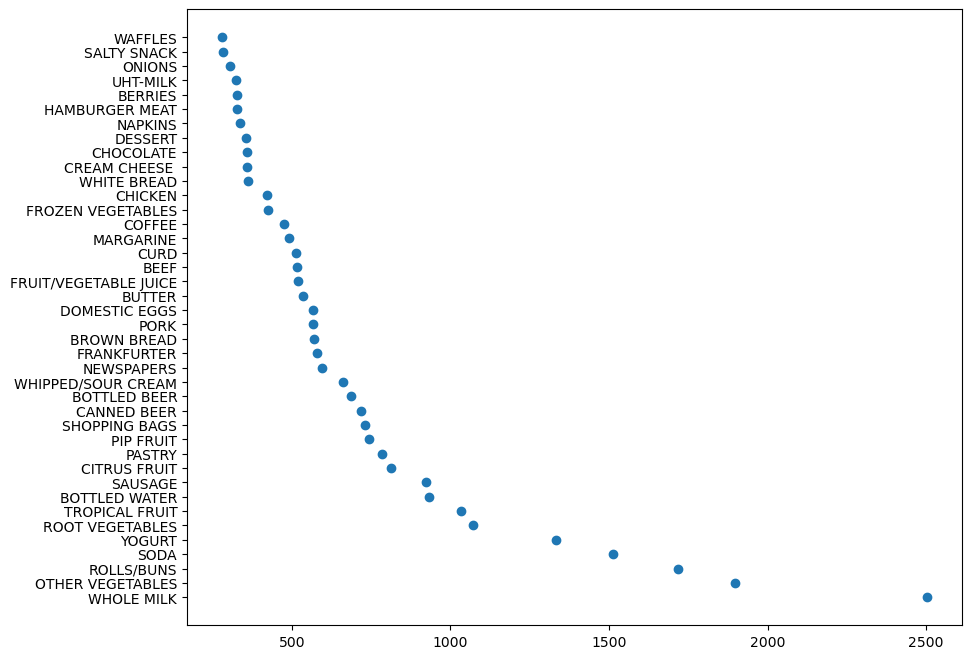

In [192]:
plt.figure(figsize=(10,8))
plt.scatter(topitems['count'], topitems['items'])
plt.yticks(topitems['items'])
plt.show()

# Analysis 

In [193]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BAKING POWDER),(BOTTLED BEER),0.031042,0.158799,0.006157,0.198347,1.249042,0.001228,1.049333,0.205774
1,(BOTTLED BEER),(BAKING POWDER),0.158799,0.031042,0.006157,0.038772,1.249042,0.001228,1.008042,0.237026
2,(BAKING POWDER),(BOTTLED WATER),0.031042,0.213699,0.009749,0.314050,1.469586,0.003115,1.146294,0.329773
3,(BOTTLED WATER),(BAKING POWDER),0.213699,0.031042,0.009749,0.045618,1.469586,0.003115,1.015273,0.406379
4,(BAKING POWDER),(BROWN BREAD),0.031042,0.135967,0.005900,0.190083,1.398004,0.001680,1.066816,0.293815
...,...,...,...,...,...,...,...,...,...,...
73301,(OTHER VEGETABLES),"(SAUSAGE, YOGURT, WHOLE MILK, SODA, ROLLS/BUNS)",0.376603,0.009492,0.005387,0.014305,1.507070,0.001813,1.004883,0.539722
73302,(SODA),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, YOGURT...",0.313494,0.013597,0.005387,0.017185,1.263904,0.001125,1.003651,0.304150
73303,(YOGURT),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, SODA, ...",0.282966,0.009749,0.005387,0.019039,1.952999,0.002629,1.009471,0.680535
73304,(WHOLE MILK),"(SAUSAGE, YOGURT, OTHER VEGETABLES, SODA, ROLL...",0.458184,0.007440,0.005387,0.011758,1.580453,0.001979,1.004370,0.677850


# confidence

<Axes: xlabel='confidence', ylabel='Count'>

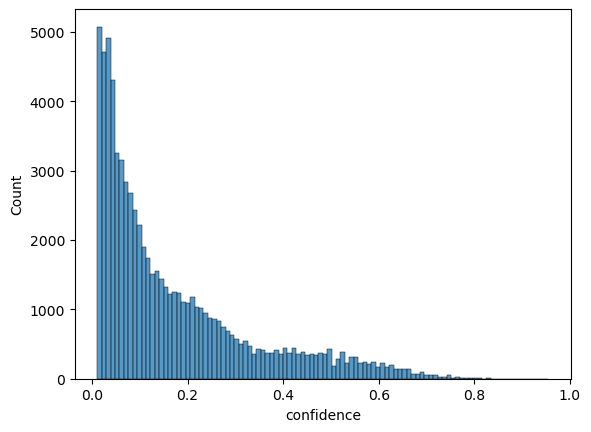

In [194]:
sns.histplot(data=rules, x='confidence')

# confidence vs support

<Axes: xlabel='support', ylabel='confidence'>

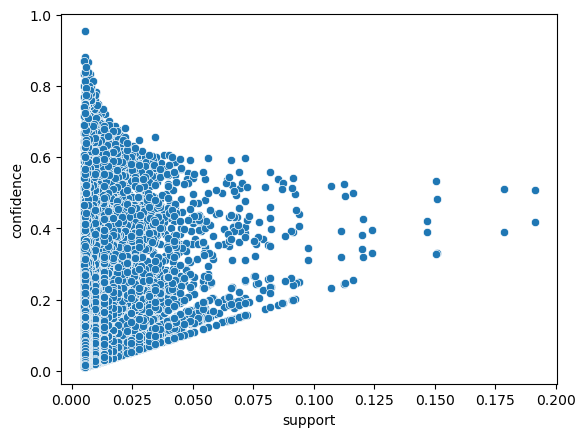

In [195]:
sns.scatterplot(data=rules, x='support', y='confidence')

# Confidence

# how often item Y is purchased when item X is purchased

In [196]:
top = rules[rules['confidence'] > 0.75]

In [197]:
top1 = top.drop(['antecedent support','consequent support','support','lift','leverage','conviction','zhangs_metric'], axis=1)
top1.head(10)

,antecedents,consequents,confidence
2846,(MEAT SPREADS),(WHOLE MILK),0.800000
7221,"(ICE CREAM, BOTTLED BEER)",(WHOLE MILK),0.761905
15111,"(PROCESSED CHEESE, CANNED BEER)",(WHOLE MILK),0.763158
16799,"(CHOCOLATE, OIL)",(OTHER VEGETABLES),0.758621
19790,"(CREAM CHEESE , SUGAR)",(WHOLE MILK),0.758621
20001,"(CURD, HAM)",(WHOLE MILK),0.821429
21405,"(MEAT, DOMESTIC EGGS)",(WHOLE MILK),0.784314
25994,"(MARGARINE, MEAT)",(WHOLE MILK),0.769231
26461,"(OTHER VEGETABLES, MAYONNAISE)",(WHOLE MILK),0.800000
27267,"(NAPKINS, WHITE BREAD)",(WHOLE MILK),0.787879


<Axes: >

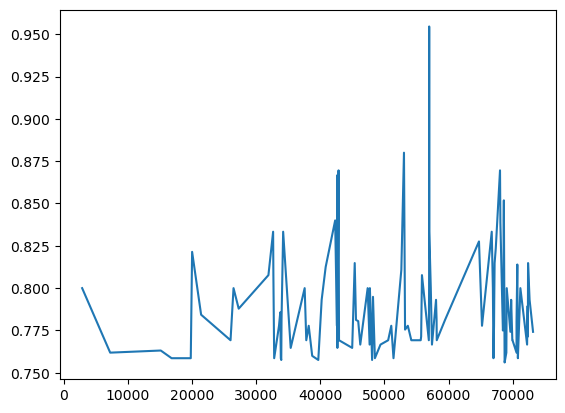

In [198]:
top1['confidence'].plot()

In [199]:
set(top1['consequents'])

{frozenset({'OTHER VEGETABLES'}),
 frozenset({'ROLLS/BUNS'}),
 frozenset({'WHOLE MILK'})}

In [200]:
table = top1.pivot(index='antecedents', columns='consequents', values='confidence')

In [201]:
table

consequents,(WHOLE MILK),(OTHER VEGETABLES),(ROLLS/BUNS)
antecedents,,,
(MEAT SPREADS),0.800000,NaN,NaN
"(ROLLS/BUNS, FRANKFURTER, OTHER VEGETABLES, BOTTLED WATER)",0.793103,NaN,NaN
"(CURD, OTHER VEGETABLES, BOTTLED WATER, YOGURT)",0.777778,NaN,NaN
"(CITRUS FRUIT, OTHER VEGETABLES, BOTTLED WATER, YOGURT)",0.758621,NaN,NaN
"(OTHER VEGETABLES, BOTTLED WATER, CANNED BEER, YOGURT)",0.800000,NaN,NaN
...,...,...,...
"(OTHER VEGETABLES, CURD, BROWN BREAD)",0.777778,NaN,NaN
"(CURD, CANNED BEER, BROWN BREAD)",0.840000,NaN,NaN
"(SPECIALTY CHOCOLATE, OTHER VEGETABLES, BOTTLED WATER)",0.812500,NaN,NaN


<Axes: ylabel='Frequency'>

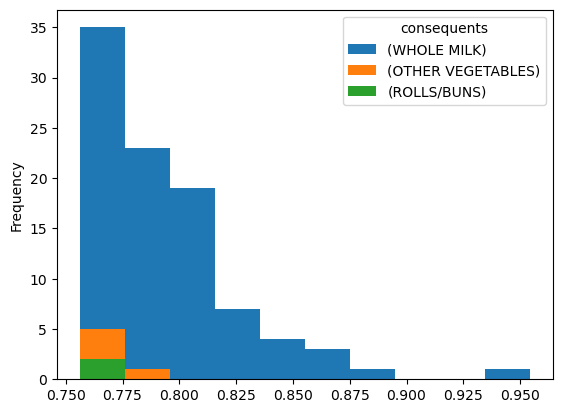

In [202]:
table.plot(kind='hist')

# Support

In [203]:
pro = rules[rules['support'] > 0.10]
pro1 = pro.drop(['confidence','lift','leverage','conviction','zhangs_metric'], axis=1)
pro1.head()

,antecedents,consequents,antecedent support,consequent support,support
592,(BOTTLED WATER),(WHOLE MILK),0.213699,0.458184,0.112365
593,(WHOLE MILK),(BOTTLED WATER),0.458184,0.213699,0.112365
3064,(OTHER VEGETABLES),(ROLLS/BUNS),0.376603,0.349666,0.146742
3065,(ROLLS/BUNS),(OTHER VEGETABLES),0.349666,0.376603,0.146742
3082,(OTHER VEGETABLES),(SODA),0.376603,0.313494,0.124166


In [204]:
set(pro1['consequents'])
support = pro1.pivot(index='antecedents', columns='consequents', values='support')
support

consequents,(WHOLE MILK),(BOTTLED WATER),(ROLLS/BUNS),(OTHER VEGETABLES),(SODA),(YOGURT),(ROOT VEGETABLES),(SAUSAGE),(TROPICAL FRUIT)
antecedents,,,,,,,,,
(BOTTLED WATER),0.112365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(WHOLE MILK),NaN,0.112365,0.178553,0.191380,0.151103,0.150590,0.113135,0.106978,0.11647
(OTHER VEGETABLES),0.191380,NaN,0.146742,NaN,0.124166,0.120318,NaN,NaN,NaN
(ROLLS/BUNS),0.178553,NaN,NaN,0.146742,0.119805,0.111339,NaN,NaN,NaN
(SODA),0.151103,NaN,0.119805,0.124166,NaN,NaN,NaN,NaN,NaN
(YOGURT),0.150590,NaN,0.111339,0.120318,NaN,NaN,NaN,NaN,NaN
(ROOT VEGETABLES),0.113135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(SAUSAGE),0.106978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(TROPICAL FRUIT),0.116470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# frequently the itemset appears in the dataset

# LIFT

# measure that quantifies the strength of association between two items, 
#Lift = 1: There is no association between X and Y. The purchase of X has no effect on the purchase of Y.

#Lift > 1: A value greater than 1 indicates a positive association. The purchase of X increases the likelihood of purchasing Y, suggesting that X and Y are positively correlated.

#Lift < 1: A value less than 1 indicates a negative association. The purchase of X decreases the likelihood of purchasing Y, suggesting that X and Y are negatively correlated.

In [205]:
high_lift = rules[rules['lift'] > 1.0]

In [206]:
table = high_lift.pivot(index='antecedents', columns='consequents', values='lift')


In [207]:
high_lift1 = high_lift.drop(['antecedent support','consequent support','support','confidence','leverage','conviction','zhangs_metric'], axis=1)

In [208]:
high_lift1

,antecedents,consequents,lift
0,(BAKING POWDER),(BOTTLED BEER),1.249042
1,(BOTTLED BEER),(BAKING POWDER),1.249042
2,(BAKING POWDER),(BOTTLED WATER),1.469586
3,(BOTTLED WATER),(BAKING POWDER),1.469586
4,(BAKING POWDER),(BROWN BREAD),1.398004
...,...,...,...
73301,(OTHER VEGETABLES),"(SAUSAGE, YOGURT, WHOLE MILK, SODA, ROLLS/BUNS)",1.507070
73302,(SODA),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, YOGURT...",1.263904
73303,(YOGURT),"(SAUSAGE, OTHER VEGETABLES, WHOLE MILK, SODA, ...",1.952999
73304,(WHOLE MILK),"(SAUSAGE, YOGURT, OTHER VEGETABLES, SODA, ROLL...",1.580453


<Axes: xlabel='lift', ylabel='Count'>

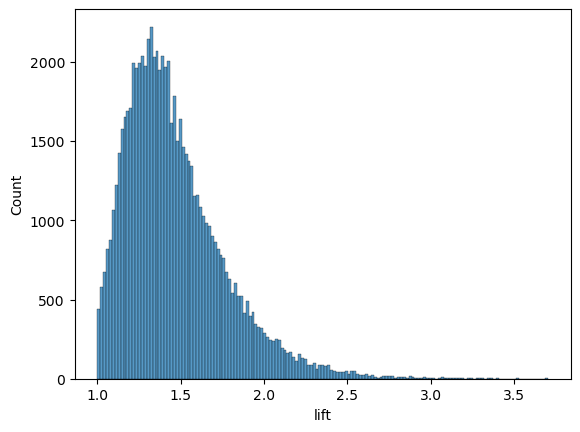

In [209]:
sns.histplot(high_lift1['lift'])

# Final

In [210]:
sorted_rule = rules.sort_values(by=['support','confidence','lift'], ascending=False)

In [212]:
sorted_rule.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3112,(OTHER VEGETABLES),(WHOLE MILK),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
3113,(WHOLE MILK),(OTHER VEGETABLES),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
3424,(ROLLS/BUNS),(WHOLE MILK),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
3425,(WHOLE MILK),(ROLLS/BUNS),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
3624,(SODA),(WHOLE MILK),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
3625,(WHOLE MILK),(SODA),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
3746,(YOGURT),(WHOLE MILK),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
3747,(WHOLE MILK),(YOGURT),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
3065,(ROLLS/BUNS),(OTHER VEGETABLES),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772
3064,(OTHER VEGETABLES),(ROLLS/BUNS),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
